<a href="https://colab.research.google.com/github/smusman/Image-Classification-using-CNN/blob/main/Task2_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <center>Assignment 2<center/>
### <center>Image Classification Using CNN and Transfer Learning<center/>
#### <center>Bird Species classification<center/>

### Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/') 

Mounted at /content/drive/


### Importing packages

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from sklearn.datasets import load_files 
from keras.utils import np_utils
import pandas as pd
import numpy as np
import os
import zipfile
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.models import Model
from keras.preprocessing import image
import sklearn.metrics as metrics
import matplotlib.cm as cm
import seaborn as sns
from IPython.display import Image, display
%matplotlib inline

### Loading data

In [ ]:
local_zip='/content/drive/MyDrive/Copy of 315_Birds_Species.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/Birds_Species')
zip_ref.close()

In [ ]:
#Defining the directories
train_path = '/tmp/Birds_Species/train'
test_path = '/tmp/Birds_Species/test'

In [ ]:
CLASSES = os.listdir(train_path)
NUM_CLASSES = len(CLASSES)

# Print the number of classes.
print("Number of Classes:", NUM_CLASSES)

# Print the list of classes.
print("Classes:", CLASSES)

Number of Classes: 315
Classes: ['JAVA SPARROW', 'CHESTNET BELLIED EUPHONIA', 'KAGU', 'NORTHERN CARDINAL', 'BELTED KINGFISHER', 'COLLARED ARACARI', 'BLACK SWAN', 'RED TAILED THRUSH', 'ROUGH LEG BUZZARD', 'SCARLET CROWNED FRUIT DOVE', 'YELLOW HEADED BLACKBIRD', 'GO AWAY BIRD', 'ANTBIRD', 'BLACK THROATED WARBLER', 'ROSY FACED LOVEBIRD', 'AFRICAN FIREFINCH', 'RING-NECKED PHEASANT', 'MALAGASY WHITE EYE', 'VARIED THRUSH', 'RED BELLIED PITTA', 'SPLENDID WREN', 'RUFUOS MOTMOT', 'BROWN THRASHER', 'FIRE TAILLED MYZORNIS', 'EURASIAN MAGPIE', 'JABIRU', 'EURASIAN GOLDEN ORIOLE', 'MAGPIE GOOSE', 'CROW', 'HOATZIN', 'SWINHOES PHEASANT', 'FLAMINGO', 'ASIAN CRESTED IBIS', 'CINNAMON TEAL', 'PHILIPPINE EAGLE', 'ORIENTAL BAY OWL', 'GAMBELS QUAIL', 'INDIAN BUSTARD', 'GREAT GRAY OWL', 'COMMON LOON', 'BALI STARLING', 'BORNEAN BRISTLEHEAD', 'RED FACED WARBLER', 'DOUBLE BRESTED CORMARANT', 'CHIPPING SPARROW', 'WILD TURKEY', 'SATYR TRAGOPAN', 'ALEXANDRINE PARAKEET', 'MIKADO  PHEASANT', 'AFRICAN CROWNED CRANE', 

### Sample Display

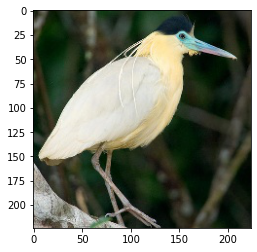

In [ ]:
img = mpimg.imread(train_path + '/CAPPED HERON/001.jpg')
imgplot = plt.imshow(img)

### Data Augmentation using ImageDataGenerator 

In [ ]:
train_datagen = ImageDataGenerator(
        rotation_range=40,                  #range within which to randomly rotate pictures
        width_shift_range=0.2,              #randomly translate pictures horizontally
        height_shift_range=0.2,             #randomly translate pictures vertically
        shear_range=0.2,                    #applying shear transformation
        zoom_range=0.2,                     #randomly zoom
        horizontal_flip=True,               #flip images horizontally
        fill_mode='nearest')

train_generator=train_datagen.flow_from_directory(
      train_path,
      target_size=(224,224),
      batch_size=32,
      class_mode='categorical'
)

test_datagen=ImageDataGenerator(rescale=1./255)
test_generator=train_datagen.flow_from_directory(
      test_path,
      target_size=(224,224),
      batch_size=32,
      class_mode='categorical'
)

Found 45980 images belonging to 315 classes.
Found 1575 images belonging to 315 classes.


### Loading VGG16 

In [ ]:
IMAGE_SIZE = [224, 224]
transfer_model = VGG16(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
#do not use existing weights
for layer in transfer_model.layers:
    layer.trainable = False

In [ ]:
flatten = Flatten()(transfer_model.output)

# Dense layer.
prediction_layers = Dense(315, activation = 'softmax')(flatten)

model = Model(inputs=transfer_model.input, outputs=prediction_layers)

# Print the model summary.
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

### Compile VGG16 Model

In [ ]:
opt = keras.optimizers.Adam(learning_rate = 0.01)

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = opt,
    metrics = [ 'accuracy' ]
)

### Train VGG16 Model

In [ ]:
history = model.fit(
    train_generator,
    validation_data = test_generator,
    epochs = 10,
    steps_per_epoch = len(train_generator),
    validation_steps = len(test_generator),
    batch_size = 32
)

Epoch 1/10
1437/1437 [==============================] - 732s 482ms/step - loss: 959.6513 - accuracy: 0.3232 - val_loss: 771.9155 - val_accuracy: 0.5333
Epoch 2/10
1437/1437 [==============================] - 679s 472ms/step - loss: 806.8018 - accuracy: 0.5350 - val_loss: 633.6351 - val_accuracy: 0.6387
Epoch 3/10
1437/1437 [==============================] - 679s 472ms/step - loss: 765.8298 - accuracy: 0.6012 - val_loss: 660.1907 - val_accuracy: 0.6851
Epoch 4/10
1437/1437 [==============================] - 668s 465ms/step - loss: 731.7003 - accuracy: 0.6499 - val_loss: 665.1097 - val_accuracy: 0.7067
Epoch 5/10
1437/1437 [==============================] - 676s 471ms/step - loss: 715.5804 - accuracy: 0.6756 - val_loss: 588.0128 - val_accuracy: 0.7289
Epoch 6/10
1437/1437 [==============================] - 668s 465ms/step - loss: 692.0301 - accuracy: 0.6963 - val_loss: 556.5485 - val_accuracy: 0.7511
Epoch 7/10
1437/1437 [==============================] - 668s 465ms/step - loss: 677.7864

### Learning Curves for VGG16

(0.0, 981.0833068847656)

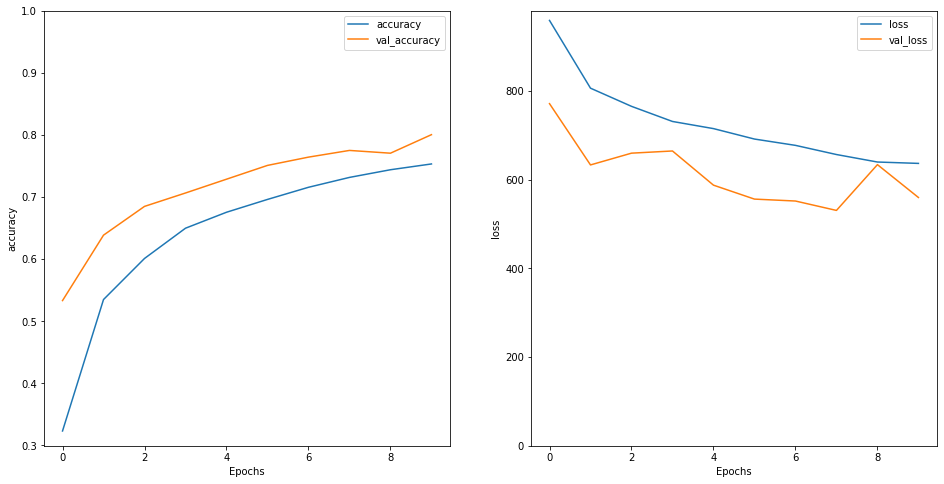

In [ ]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plot_graphs(history, 'accuracy')
plt.ylim(None,1)
plt.subplot(1,2,2)
plot_graphs(history, 'loss')
plt.ylim(0,None)

### Quantitative Results VGG16 (Loss and Accuracy)

In [ ]:
result=model.evaluate(test_generator)
print('Loss:',result[0])
print('Accuracy:',result[1])

50/50 [==============================] - 22s 436ms/step - loss: 626.9868 - accuracy: 0.7886
Loss: 626.98681640625
Accuracy: 0.7885714173316956


### (Grad-CAM) Visualization


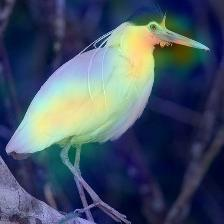

In [ ]:
# Function to fetch an image in the form of an array.
def get_img_array(img_path, size):
    img = image.load_img(img_path, target_size = size)
    img_arr = image.img_to_array(img)
    img_arr = np.expand_dims(img_arr, axis=0)
    return img_arr

# Function to generate the Grad-CAM heatmap from https://keras.io/examples/vision/grad_cam/.
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions.
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer.
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer.
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel.
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation.
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1.
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

img_size = (224, 224)
last_conv_layer_name = "block5_conv3"
img_path = train_path + '/CAPPED HERON/001.jpg'

img_arr = preprocess_input(get_img_array(img_path, size=img_size))

# Remove activation for the outermost layer.
model.layers[-1].activation = None

pred_res = model.predict(img_arr)

# Generate Grad-CAM heatmap.
heatmap = make_gradcam_heatmap(img_arr, model, last_conv_layer_name)

def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = image.load_img(img_path)
    img = image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)